# Финальный проект модуля Python
#  «Анализ данных об оптовых продажах аудиотехники»

**В финальном проекте модуля Python вам предстоит поработать аналитиком данных в компании «Карпов Саунд», которая занимается оптовой продажей аудиотехники и предлагает широкий ассортимент товаров от ведущих мировых брендов, включающий профессиональные аудиосистемы, домашние кинотеатры, портативные аудиоустройства и прочие аксессуары.** 

«Карпов Саунд» сотрудничает с крупными розничными сетями и специализированными магазинами аудиотехники в России. Клиенты компании регулярно оставляют заявки на закупку товаров в CRM системе, менеджеры связываются с клиентами, обсуждают детали, после чего заказы либо подтверждаются менеджерами, либо по разным причинам отменяются. 

В «Карпов Саунд» трепетно относятся к хранению информации о своих товарах, клиентах и заказах, однако в самый неподходящий момент хранилище данных компании оказалось временно недоступно из-за плановых работ по его оптимизации. Поэтому в рамках этого проекта все данные будут представлены не в самом удобном для анализа виде — в формате резервной выгрузки, разложенной по разным папкам на сервере компании.

Вам необходимо собрать данные из разрозненных источников, проанализировать их и сделать выводы, которые помогут руководству компании принять верные тактические решения.

**В ходе работы над проектом вам встретятся следующие таблицы:**  

1) orders (данные о заказах):  
- order_id — номер заказа  
- product_id — идентификатор товара  
- quantity — количество этого товара в заказе

2) order_status (данные о статусах заказов и клиентах):
- order_id — номер заказа  
- client_id — идентификатор клиента  
- status — статус заказа

3) products (данные о товарах):
- id — идентификатор товара  
- name — имя товара (сначала указан бренд, через запятую модель товара)  
- price — цена единицы товара, в долларах

Каждый заказ имеет статус или подтвержденного (`confirmed`), или отмененного (`canceled`). В одном заказе может быть несколько разных товаров. Если заказ был отменен, а потом создан такой же (тем же клиентом, с теми же товарами, у того же менеджера), в базе останется запись о двух заказах с разными номерами и статусами, поскольку система не позволяет создать заказ с тем же номером.

Сначала вам нужно собрать и предобработать три типа датасетов: `orders.csv`, `order_status.csv`, `products.csv`.

На схеме показано, как связаны таблицы между собой:

![](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37264/104636/497986/er_white.png)

Данные находятся в папке `data` из директории `shared` (`shared` -> `homeworks` -> `python_ds_miniprojects` -> `final_project`). Внутри папки `data` находятся 2 другие папки: `orders` и `products`.

В папке `orders` папки с датами, в которые сделаны записи. В этих папках — папки с именами менеджеров по продажам. Эти папки содержат файлы `orders.csv` и `order_status.csv` (в каждой папке по одной паре файлов). Пример структуры: `data` -> `orders` -> `2024-03-01` -> `Алексей Саксофонов` -> `orders.csv` и `order_status.csv`.

В папке `products` папки с категориями товаров. В этих папках файлы `products.csv` (в каждой папке по одному файлу). Пример структуры: `data` -> `products` -> `AV-процессор` -> `products.csv`.

Кроме того у вас есть файл `usd_rate.txt` с курсом доллара США на каждый день анализируемого периода (данные в формате `дата,курс,валюта`). Он потребуется в середине проекта.

В финальном проекте модуля вы можете пользоваться подсказками в ноутбуке (они менее подробные, чем были в предыдущих уроках), обращаться за помощью к экспертам в Discord и смотреть разборы в LMS (за просмотр разбора снимается половина баллов за задание).

### Соберем датасет с заказами по папкам

## Шаг 2

**Ваша первая задача — собрать данные со всех папок в три датафрейма:**  
1. `df_orders` — на основе датасетов `orders.csv` + добавьте колонку `manager` с именами менеджеров и колонку `date` с датами. 
2. `df_order_status` — на основе датасетов `order_status.csv`.  
3. `df_products` — на основе датасетов `products.csv` + добавьте колонку `category` с категориями товаров.  

**Соберите датафреймы и сохраните их в соответствующие csv файлы: `df_orders.csv`, `df_order_status.csv` и `df_products.csv`. Отправьте файлы на проверку в LMS.**

In [334]:
# Ваш код здесь
import pandas as pd
import os
way = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-tatjana-bazhan-cec-4a32c/shared/homeworks/python_ds_miniprojects/final_project/data'

target_files = ['orders.csv', 'order_status.csv', 'products.csv']
data_files = []

for path, dirs, files in os.walk(way):
    for file in files:
        if file in target_files:
            data_file = os.path.join(path, file)
            data_files.append(data_file)

In [335]:
data_files

['/mnt/HC_Volume_18315164/home-jupyter/jupyter-tatjana-bazhan-cec-4a32c/shared/homeworks/python_ds_miniprojects/final_project/data/products/AV-ресивер/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-tatjana-bazhan-cec-4a32c/shared/homeworks/python_ds_miniprojects/final_project/data/products/Настенная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-tatjana-bazhan-cec-4a32c/shared/homeworks/python_ds_miniprojects/final_project/data/products/Система караоке/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-tatjana-bazhan-cec-4a32c/shared/homeworks/python_ds_miniprojects/final_project/data/products/Напольная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-tatjana-bazhan-cec-4a32c/shared/homeworks/python_ds_miniprojects/final_project/data/products/Полочная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-tatjana-bazhan-cec-4a32c/shared/homeworks/python_ds_miniprojects/final_project/data/products/Са

In [336]:
orders_df_list = []
order_status_df_list = []
products_df_list = []

for file_path in data_files:
    df = pd.read_csv(file_path)
    
    if 'orders.csv' in file_path:
        df['manager'] = file_path.split('/')[-2]
        df['date'] = file_path.split('/')[-3]
        orders_df_list.append(df)
    elif 'products.csv' in file_path:
        df['category'] = file_path.split('/')[-2]
        products_df_list.append(df)
    elif 'order_status.csv' in file_path:
        order_status_df_list.append(df)

In [337]:
df_orders = pd.concat(orders_df_list, ignore_index=True)
df_order_status = pd.concat(order_status_df_list, ignore_index=True)
df_products = pd.concat(products_df_list, ignore_index=True)

In [338]:
df_orders.shape

(4603, 5)

In [339]:
df_order_status.shape

(346, 3)

In [340]:
df_products.shape

(1677, 4)

In [341]:
df_orders.to_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-tatjana-bazhan-cec-4a32c/8_урок_Проект/df_orders.csv', index=False)
df_order_status.to_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-tatjana-bazhan-cec-4a32c/8_урок_Проект/df_order_status.csv', index=False)
df_products.to_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-tatjana-bazhan-cec-4a32c/8_урок_Проект/df_products.csv', index=False)

### Посмотрим на общую динамику заказов и определим дни, которые выбиваются из общей картины

## Шаг 3

Посчитайте количество заказов в каждый день. **Определите день с наибольшим числом заказов.** Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд).

In [342]:
df_orders.head()

,order_id,product_id,quantity,manager,date
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10


In [343]:
df_order_status.head()

,order_id,client_id,status
0,QPLK-54839036,52,confirmed
1,MAQJ-95867467,84,canceled
2,KHLF-51759445,23,confirmed
3,DALF-47566548,97,confirmed
4,BZHU-92977894,29,canceled


In [344]:
df_products.head()

,id,name,price,category
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер


In [345]:
# Ваш код здесь
df_orders['date'] = pd.to_datetime(df_orders['date'])
df_orders_groupby = df_orders.groupby('date')['order_id'].nunique().reset_index()
df_orders_groupby = df_orders_groupby.rename(columns={'order_id': 'orders'})
df_merged = pd.merge(df_orders, df_orders_groupby, on='date', how='left')
df_merged

,order_id,product_id,quantity,manager,date,orders
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,3
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,3
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,3
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,3
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,3
...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,17
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,17
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,17
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,17


In [346]:
df_merged.sort_values(by = 'orders', ascending = False)

,order_id,product_id,quantity,manager,date,orders
1824,EPBF-14743479,180,13,Виктор Тромбонов,2024-03-14,34
1630,AUZX-12706022,138,30,Екатерина Тарелкина,2024-03-14,34
1639,AUZX-12706022,790,19,Екатерина Тарелкина,2024-03-14,34
1638,AUZX-12706022,1549,17,Екатерина Тарелкина,2024-03-14,34
1637,AUZX-12706022,434,30,Екатерина Тарелкина,2024-03-14,34
...,...,...,...,...,...,...
2791,YHMP-64962628,537,4,Маргарита Камертонова,2024-03-03,1
4317,OYBY-86181208,296,22,Анастасия Дудкина,2024-03-31,1
2595,BKWO-98301947,1286,8,Надежда Гармошкина,2024-03-09,1
2596,BKWO-98301947,594,21,Надежда Гармошкина,2024-03-09,1


## Шаг 4

**Постройте график с количеством заказов по дням и определите, заметна ли в данных сезонность.**

- Да, по выходным заказов намного больше, чем в остальные дни  
- Да, по выходным почти нет заказов  
- Да, по понедельникам заказов всегда больше, чем в остальные дни недели  
- Да, по понедельникам заказов всегда меньше, чем в остальные дни недели  
- Нет, в данных сложно обнаружить какие-то закономерности  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

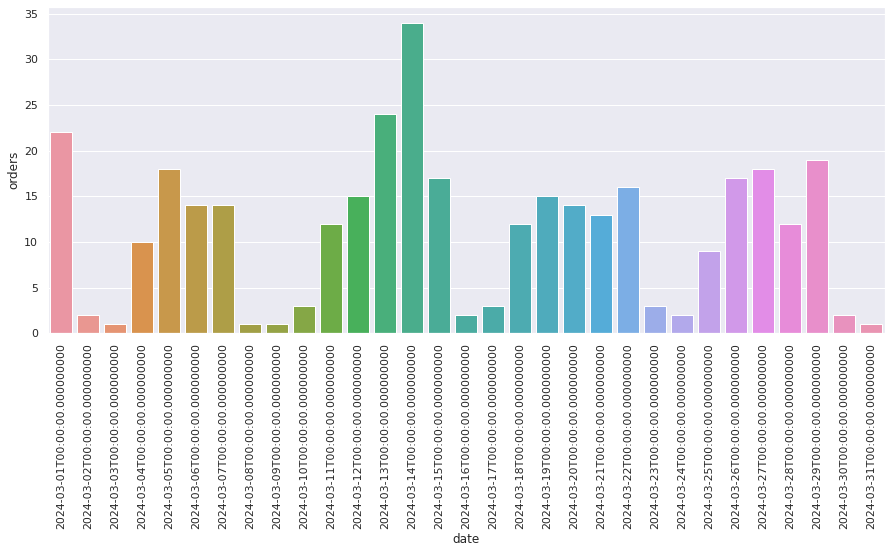

In [347]:
# Ваш код здесь
import seaborn as sns
import matplotlib.pyplot as plt
df_merged = df_merged.sort_values(by='date')
sns.set()
plt.figure(figsize=(15, 6))
sns.barplot(x='date', y='orders', data=df_merged)
plt.xticks(rotation=90)

## Шаг 5

**Кажется, в данных помимо дня с наибольшим числом заказов есть еще один день, который выбивается из общей картины.** Что это за день:  
- Это воскресенье, в которое было много заказов?  
- Это понедельник, в который было много заказов?  
- Это пятница, в которую было мало заказов?  
- Это праздничный день, в который было мало заказов?

Подумайте, почему так вышло? Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд)

## Шаг 6

К вам пришел радостный руководитель отдела продаж и попросил выяснить причину, почему заказы в один из дней резко подскочили, чтобы и дальше увеличивать продажи.

Возможно, в день с наибольшим числом заказов (который вы определили на третьем шаге) отдел маркетинга запустил какую-то акцию? Или менеджеры стали активнее предлагать компаниям оформить заказ? Нужно подробнее изучить этот день. Начнем со статусов заказа.

**Добавьте к данным о заказах информацию об их статусах. Общий датафрейм назовите `orders_status`. Сохраните получившийся датафрейм в csv файл `orders_status.csv` (при сохранении используйте параметр `index=False`) и отправьте этот csv файл на проверку в LMS.**

In [348]:
# Ваш код здесь
orders_status = pd.merge(df_orders, df_order_status, on='order_id', how = 'left')
orders_status
orders_status.to_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-tatjana-bazhan-cec-4a32c/8_урок_Проект/orders_status.csv', index=False)

## Шаг 7

Посмотрите на количество и соотношение подтвержденных и отмененных заказов. **В ответе укажите долю отмененных заказов.** Ответ округлите до двух знаков после точки.

In [349]:
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed
...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed


In [350]:
# Ваш код здесь
orders_status_groupby = orders_status[['order_id', 'status']]
orders_status_groupby

,order_id,status
0,QPLK-54839036,confirmed
1,QPLK-54839036,confirmed
2,QPLK-54839036,confirmed
3,QPLK-54839036,confirmed
4,QPLK-54839036,confirmed
...,...,...
4598,UAKD-95751033,confirmed
4599,UAKD-95751033,confirmed
4600,UAKD-95751033,confirmed
4601,UAKD-95751033,confirmed


In [351]:
orders_status_drop_dubl = orders_status_groupby.drop_duplicates(subset='order_id')
orders_status_count = orders_status_drop_dubl.shape[0]

orders_status_confirmed = orders_status_drop_dubl.query('status == "confirmed"')
orders_status_confirmed_count = orders_status_confirmed.shape[0]

orders_status_canceled = orders_status_drop_dubl.query('status == "canceled"')
orders_status_canceled_count = orders_status_canceled.shape[0]

In [352]:
orders_status_count

346

In [353]:
orders_status_confirmed_count

309

In [354]:
orders_status_canceled_count

37

In [355]:
status_confirmed_dol = round(orders_status_confirmed_count / orders_status_count, 2)
status_confirmed_dol

0.89

In [356]:
status_canceled_dol = round(orders_status_canceled_count / orders_status_count, 2)
status_canceled_dol

0.11

## Шаг 8

**Посчитайте количество подтвержденных и отмененных заказов на каждую дату.** Определите, в какой день не было ни одного подтвержденного заказа. Для этого сделайте сводную таблицу, где в строках будут даты, в колонках — стутасы заказов, а значения — число заказов с этим статусом в определенную дату. Пропуски заполните нулями.  

**В ответ укажите день, когда не было ни одного подтвержденного заказа.** Дату укажите в том формате, в котором она представлена в данных (гггг-мм-дд).

In [357]:
# Ваш код здесь
orders = orders_status.groupby(['date', 'status']).order_id.nunique().reset_index()
orders = pd.DataFrame(orders)
orders = orders.rename(columns={'order_id' : 'orders'})
orders_table = orders.pivot(index='date', columns='status', values='orders').fillna(0)
orders_table['canceled'] = orders_table['canceled'].astype(int)
orders_table['confirmed'] = orders_table['confirmed'].astype(int)
orders_table_count = orders_table.query('confirmed == 0')
orders_table_count

status,canceled,confirmed
date,,
2024-03-09,1,0


## Шаг 9

**Постройте график с заказами по дням в разбивке по статусу заказа.** Посмотрим подробнее на день с наибольшим числом заказов (вместе и подтвержденных, и отменных), который мы определили ранее, и на день, предшествующий ему. Какой вывод можно сделать? Выберите один или несколько вариантов:

- В день с наибольшим числом заказов было очень много отмен  
- В день с наибольшим числом заказов было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, было много отмен  
- В день, предшествующий дню с наибольшим числом заказов, было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного успешно оформленного заказа  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного отмененного заказа

In [359]:
orders.head()

,date,status,orders
0,2024-03-01,canceled,2
1,2024-03-01,confirmed,20
2,2024-03-02,confirmed,2
3,2024-03-03,confirmed,1
4,2024-03-04,confirmed,10


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

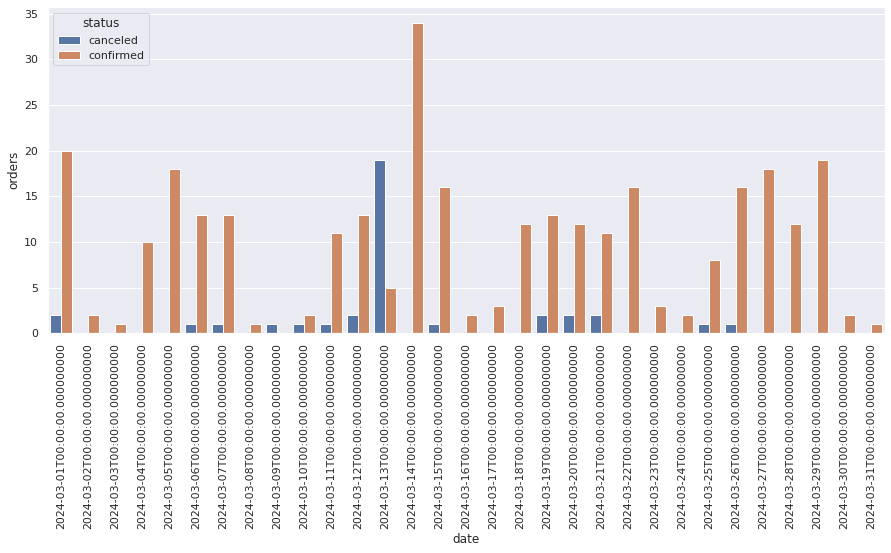

In [366]:
# Ваш код здесь
import seaborn as sns
import matplotlib.pyplot as plt
orders = orders.sort_values(by='date')
sns.set()
plt.figure(figsize=(15, 6))
sns.barplot(data=orders, x='date', y='orders', hue='status', ci=None)
plt.xticks(rotation=90)


## Шаг 10

Рассмотрим эти два дня отдельно (день с наибольшим числом заказов, который мы определили ранее, и день, предшествующий ему). Проанализируйте заказы за эти дни и ответьте, какую из этих гипотез можно назвать наиболее правдоподобной.

- Так сложилось, что один день оказался крайне неудачным для отдела продаж, все клиенты отменили свои заказы. А на следующий день отдел продаж пытался компенсировать отсутствие продаж в предыдущий и перевыполнил дневной план. Почти все заказы не повторяют вчерашние  
- Произошел сбой в работе CRM системы, который не позволил клиентам подтвердить заказ. В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам пришлось оформлять их повторно на следующий день. Почти половина заказов повторяет вчерашние

Как можно определить, что заказ повторяет вчерашний? У заказов будут совпадать сразу несколько параметров: клиент, менеджер, количество уникальных товаров в заказе и общее число товаров в штуках. Но номера заказов будут разными.

In [39]:
# Ваш код здесь



### Посчитаем ключевые метрики, посмотрим на их динамику и составим небольшой отчет

## Шаг 11

**У вас есть данные за целый месяц, поэтому пора посчитать ключевые метрики этого месяца.** Но вот незадача - в ваших данных цена единицы товара указана в долларах США, потому что закупаете их в долларах, но продаете товары за российские рубли (по тому курсу, который установил Центробанк на дату продажи), а значит и метрики требуется посчитать в рублях. Хорошо, что у вас есть текстовый файл с курсом доллара США на каждую дату. **Откройте файл `usd_rate.txt`, соберите из него датафрейм с 2 колонками: `date` и `currency_rate`. Посчитайте среднее значение курса доллара за месяц.** Результат округлите до двух знаков после точки.

In [381]:
# Ваш код здесь
with open('usd_rate.txt', 'r') as file:
    currency = file.readlines()

In [389]:
currency = [s.strip() for s in currency]

In [415]:
exchange_rate = pd.DataFrame(currency, columns=['exchange_rate'])
exchange_rate[['date', 'exchange_rate', 'currency']] = exchange_rate['exchange_rate'].str.split(',', expand=True)
exchange_rate['exchange_rate'] = exchange_rate['exchange_rate'].astype(float)
exchange_rate['date'] = pd.to_datetime(exchange_rate['date'])
exchange_rate = exchange_rate.drop(columns=['currency'])

In [416]:
exchange_rate.head()

,exchange_rate,date
0,90.8423,2024-03-01
1,91.3336,2024-03-02
2,91.3336,2024-03-03
3,91.3336,2024-03-04
4,91.3534,2024-03-05


In [417]:
exchange_rate_mean = exchange_rate.exchange_rate.mean()
exchange_rate_mean

91.69706451612903

## Шаг 12

**Работу с ключевыми метриками начните с подсчета общей выручки.** Данные по товарам в подтвержденных заказах у вас есть в датафрейме `orders_status`, а стоимость одной единицы товара можно взять из датафрейма `df_products`. Объедините эти датафреймы в общий `df_full`, добавьте к ним информацию по курсу доллара на каждую дату. Создайте колонку с выручкой для каждого товара в заказах и посчитайте, **чему равна общая выручка в рублях?** Учитывайте только подтвержденные заказы. Результат округлите до двух знаков после точки.

In [406]:
orders_status.head()

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed


In [407]:
df_products.head()

,id,name,price,category
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер


In [423]:
# Ваш код здесь
df_full = pd.merge(orders_status, df_products, left_on='product_id',right_on='id')
df_full_curr = pd.merge(df_full, exchange_rate, on='date')
df_full_curr['price_rub'] = df_full_curr['price'] * df_full_curr['exchange_rate']
df_full_curr['revenue'] = df_full_curr['price_rub'] * df_full_curr['quantity']
df_confirmed = df_full_curr.query('status == "confirmed"')
df_revenue_sum = round(df_confirmed.revenue.sum(), 2)
df_revenue_sum

2038231821.56

In [485]:
df_confirmed

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,exchange_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,YHMP-64962628,564,40,Маргарита Камертонова,2024-03-03,44,confirmed,564,"JBL, Tune 510BT",45.38,Беспроводные наушники,91.3336,4144.718768,1.657888e+05
4599,YHMP-64962628,486,17,Маргарита Камертонова,2024-03-03,44,confirmed,486,"Heco, Ambient 22F",185.50,Настенная акустика,91.3336,16942.382800,2.880205e+05
4600,YHMP-64962628,832,28,Маргарита Камертонова,2024-03-03,44,confirmed,832,"LG, SK1",86.56,Саундбар,91.3336,7905.836416,2.213634e+05
4601,YHMP-64962628,254,10,Маргарита Камертонова,2024-03-03,44,confirmed,254,"Edifier, R1280T",86.99,Активные колонки,91.3336,7945.109864,7.945110e+04


## Шаг 13

**Следующая метрика, которую вам нужно посчитать — средний чек в этом месяце (в рублях).** Разделите общую выручку на количество заказов. Результат округлите до двух знаков после точки.

In [427]:
# Ваш код здесь
df_confirmed_orders = df_confirmed.order_id.nunique()
mean_revenue = round(df_revenue_sum / df_confirmed_orders, 2)
mean_revenue

6596219.49

## Шаг 14

Ключевые метрики месяца вы посчитали, теперь попробуйте посмотреть на их динамику внутри месяца: посчитайте выручку, средний чек и число заказов — на каждый день. Посмотрите на графики и выберите верные ответы:

- число заказов и выручка каждый день изменяются в одинаковом направлении (если в этот день число заказов выросло, то и выручка выросла; число заказов упало — в этот же день упала и выручка)  
- число заказов и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день число заказов выросло, то выручка может упасть, и наоборот: число заказов упало — в этот же день выручка выросла)  
- средний чек и выручка каждый день изменяются в одинаковом направлении (если в этот день средний чек вырос, то и выручка выросла; средний чек упал — в этот же день упала и выручка)  
- средний чек и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день средний чек вырос, то выручка может упасть, и наоборот: средний чек упал — в этот же день выручка выросла)  
- в день с наибольшим числом заказов и выручка, и средний чек также показывают максимальное значение  
- в день с наибольшим числом заказов выручка и/или средний чек не показывают максимальное значение  
- с течением времени выручка то увеличивается, то уменьшается  
- с течением времени выручка только увеличивается  
- на протяжении всего месяца средний чек то увеличивается, то уменьшается  
- средний чек на протяжении всего месяца имеет одинаковое значение

In [439]:
# Ваш код здесь
df_report_by_date = df_confirmed.groupby('date').agg({'order_id': 'nunique', 'revenue': 'sum'}).reset_index()
df_report_by_date = df_report_by_date.rename(columns={'order_id' : 'orders'})
df_report_by_date
df_report_by_date['mean_revenue'] = df_report_by_date['revenue'] / df_report_by_date['orders']
df_report_by_date.head()

,date,orders,revenue,mean_revenue
0,2024-03-01,20,1.554118e+08,7.770588e+06
1,2024-03-02,2,1.197167e+07,5.985834e+06
2,2024-03-03,1,2.548418e+06,2.548418e+06
3,2024-03-04,10,6.404993e+07,6.404993e+06
4,2024-03-05,18,8.952724e+07,4.973735e+06


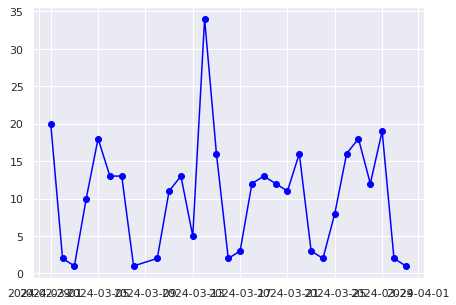

In [452]:
plt.figure(figsize=(7,5))
plt.plot(df_report_by_date['date'], df_report_by_date['orders'], marker='o', color='blue')

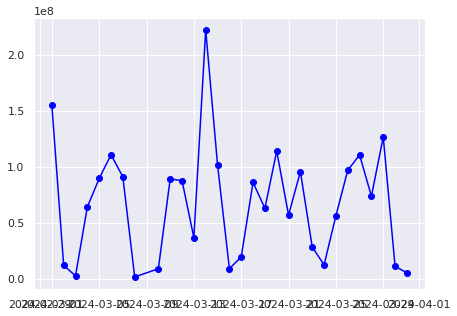

In [453]:
plt.figure(figsize=(7,5))
plt.plot(df_report_by_date['date'], df_report_by_date['revenue'], marker='o', color='blue')

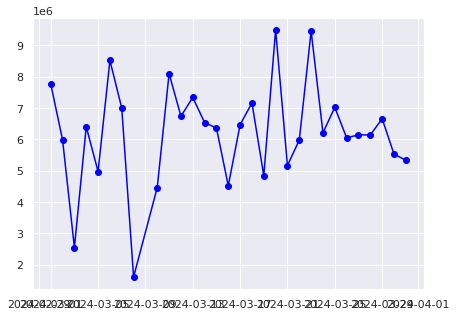

In [454]:
plt.figure(figsize=(7,5))
plt.plot(df_report_by_date['date'], df_report_by_date['mean_revenue'], marker='o', color='blue')

### Проанализируем интерес клиентов к брендам

## Шаг 15

К вам снова обратился руководитель отдела продаж. Он хочет разобраться, какие бренды востребованы среди клиентов, а какие — нет. На основе данных о названиях товаров в датафрейме `df_full` создайте новую колонку `brand`, где будет только название бренда. **Посчитайте, сколькими брендами интересовались клиенты** (статус заказа здесь не важен, если запись о бренде попала в данные о заказах, значит клиент заказал или хотел заказать товар этого бренда).

In [492]:
df_confirmed.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,exchange_rate,price_rub,revenue,brand
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05,Heco
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05,JBL
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06,KEF
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04,Heco
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04,Rode


In [493]:
# Ваш код здесь
df_confirmed['brand'] = df_confirmed['name'].apply(lambda x: x.split(',')[0])
df_confirmed_brand_uniq = df_confirmed.brand.nunique()
df_confirmed_brand_uniq

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


121

## Шаг 16

Посчитайте, какую выручку принес каждый бренд и в скольких подтвержденных заказах были товары этого бренда. **Определите, какой бренд принес наибольшую выручку.** В ответ укажите его название.

Дополнительно: проверьте, именно этот бренд встречается в большем количестве заказов, чем другие бренды? Или может его реже заказывают, но на более крупные суммы?

In [494]:
df_confirmed.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,exchange_rate,price_rub,revenue,brand
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05,Heco
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05,JBL
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06,KEF
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04,Heco
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04,Rode


In [506]:
df_confirmed_brand = df_confirmed.groupby('brand').agg({'revenue': 'sum', 'order_id': 'nunique'}).reset_index()
df_confirmed_brand = df_confirmed_brand.rename(columns={'order_id':'orders'})
df_confirmed_brand = df_confirmed_brand.sort_values(by='revenue',ascending = False)
df_confirmed_brand = df_confirmed_brand.sort_values(by='orders',ascending = False)
df_confirmed_brand

,brand,revenue,orders
46,JBL,2.665961e+08,264
43,Heco,2.388163e+08,229
120,Yamaha,1.658651e+08,218
53,Klipsch,2.039024e+08,205
62,Magnat,1.141989e+08,154
...,...,...,...
8,AudioSource,3.388167e+04,1
40,Fosi Audio,3.129419e+04,1
107,Technics,2.648291e+05,1
18,Bravo Audio,2.405086e+04,1


## Шаг 17

У одних брендов большинство товаров востребовано клиентами, а у других — клиенты заказывают только небольшую часть товаров, а остальные зря занимают виртуальную «полку» в перечне товаров, продаваемых вашей компанией. **Вам нужно определить, какие бренды редко попадают в заказы, хотя товаров таких брендов на самом деле много.**

Начнем с того, что определим, какие товары из имеющихся в продаже хоть раз заказывали, а какие — нет. Для этого соберите список из перечня уникальных идентификаторов товаров, которые встречаются в датафрейме `df_confirmed`. После этого для каждого товара в датафрейме `df_products` определите, был ли этот товар в списке заказанных товаров в этом месяце или нет: создайте новую колонку `is_in_orders` и заполните её соответственно значениями `yes` или `no` для каждого товара.

**В ответе укажите, сколько товаров были заказаны, а сколько — не были**

In [522]:
# Ваш код здесь
products_in_orders = df_confirmed['product_id'].unique()
products_in_orders

array([489, 594, 670, ..., 656, 223, 537])

In [523]:
df_products['is_in_orders'] = df_products['id'].apply(lambda x: 'yes' if x in products_in_orders else 'no')
df_products['is_in_orders'].value_counts()

yes    1180
no      497
Name: is_in_orders, dtype: int64

## Шаг 18

Примерно треть товаров не была заказана ни разу в этом месяце. Посмотрим на эти данные в разрезе по брендам. **Определите, у каких брендов доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда.** Но не берите в расчет бренды, которые представлены маленьким числом товаров (меньше 15), они не захламляют виртуальную «полку».

Отметьте бренды, у которых доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда: 
- AKG  
- ASUS	
- Dali  
- Emotiva  
- KEF  
- Marantz  
- Onkyo  
- Pioneer  
- Yaqin

In [568]:
# Ваш код здесь
df_products['brand'] = df_products['name'].apply(lambda x: x.split(',')[0])
df_products_brand_isonord = df_products.groupby(['brand', 'is_in_orders']).id.nunique().reset_index()
df_products_brand_isonord = pd.DataFrame(df_products_brand_isonord)
df_products_brand_isonord = df_products_brand_isonord.rename(columns={'id' : 'products'})
df_products_table = df_products_brand_isonord.pivot(index='brand', columns='is_in_orders', values='products').fillna(0)
df_products_table = df_products_table.reset_index()
df_products_table['total'] = df_products_table['yes'] + df_products_table['no']

In [572]:
df_products_table['zero_order'] = df_products_table['no'] / df_products_table['total']
df_products_table_succ = df_products_table.query('total > 15 & zero_order > 0.5')

In [573]:
df_products_table_succ

is_in_orders,brand,no,yes,total,zero_order
32,Dali,49.0,18.0,67.0,0.731343
60,KEF,54.0,28.0,82.0,0.658537
77,Marantz,19.0,3.0,22.0,0.863636
94,Pioneer,70.0,33.0,103.0,0.679612


### Составим отчет по продажам менеджеров

## Шаг 19

Чтобы компания знала, кого из менеджеров отдела продаж премировать, а с кем провести беседу по итогам месяца, **вас попросили сделать отчет по сделкам каждого менеджера**: сколько он оформил подтвержденных заказов и какую выручку они принесли. Но в абсолютных числах вклад каждого сотрудника может быть непонятен. **Поэтому посчитайте значения в процентах: какой % выручки от общей выручки за месяц приходится на каждого менеджера, и какой % заказов от общего числа заказов.** Посчитайте данные и визуализируйте результат, чтобы принимать решение о поощрении или проведении беседы с менеджерами было удобнее. Выберите верные ответы:

- лучшим менеджером по % выручки стала Маргарита Камертонова  
- лучшим менеджером по % заказов стала Маргарита Камертонова  
- первая пятерка менеджеров по % выручки сильно ушла вперед от всех остальных (явно виден большой разрыв между каждым из первой пятерки и каждым из всех остальных менеджеров)  
- в этом месяце нельзя выделить явную пятерку лидеров по % выручки, которые сильно оторвались от остальных  
- лидер по % заказов реализовал более 16% заказов  
- лидер по % заказов реализовал менее 16% заказов  
- наихудшие показатели у Сергея Контрабасова  
- наихудшие показатели у Аркадия Октавина  
- Антон Скрипкин принес в 3 раза меньше выручки, чем Виктор Тромбонов  
- Антон Скрипкин реализовал почти в 3 раза меньше заказов, чем Анастасия Дудкина

In [593]:
# Ваш код здесь
df_confirmed_manager = df_confirmed.groupby('manager').agg({'revenue': 'sum', 'order_id' : 'nunique'})
df_confirmed_manager = df_confirmed_manager.rename(columns={'order_id' : 'orders'})
df_confirmed_manager = df_confirmed_manager.sort_values(by='revenue',ascending=False)
all_revenue_manager = df_confirmed_manager.revenue.sum()
all_orders_manager = df_confirmed_manager.orders.sum()
df_confirmed_manager['per_revenue'] = round(df_confirmed_manager['revenue'] / all_revenue_manager * 100, 2)
df_confirmed_manager['per_orders'] = round(df_confirmed_manager['orders'] / all_orders_manager * 100, 2)
df_confirmed_manager.reset_index()
df_confirmed_manager.head(10)

,revenue,orders,per_revenue,per_orders
manager,,,,
Маргарита Камертонова,3.473886e+08,48,17.04,15.53
Виктор Тромбонов,3.188999e+08,50,15.65,16.18
Максим Барабанов,2.401478e+08,40,11.78,12.94
Владимир Ударников,2.084865e+08,31,10.23,10.03
Алексей Саксофонов,1.953435e+08,27,9.58,8.74
Ксения Балалайкина,1.817621e+08,27,8.92,8.74
Екатерина Тарелкина,1.781576e+08,28,8.74,9.06
Надежда Гармошкина,1.347836e+08,21,6.61,6.80
Анастасия Дудкина,1.234504e+08,20,6.06,6.47


In [582]:
all_revenue_manager

2038231821.5648634

Index(['revenue', 'orders', 'per_revenue', 'per_orders'], dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

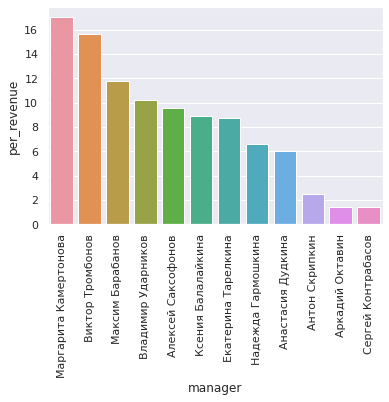

In [596]:
sns.barplot(x=df_confirmed_manager.index, y='per_revenue', data=df_confirmed_manager)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

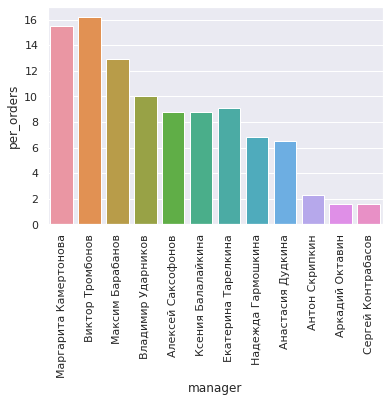

In [598]:
sns.barplot(x=df_confirmed_manager.index, y='per_orders', data=df_confirmed_manager)
plt.xticks(rotation=90)

## Итоги

В финальном проекте модуля Python вы проанализировали продажи музыкальных товаров: собрали данные, посчитали ключевые метрики в динамике; определили дни, которые выбиваются из общей картины, и выяснили причину этого; нашли наиболее прибыльные бренды и те, которые зря занимают место на виртуальной «полке». Вы проделали отличную работу!

Но если считаете, что можете больше, продолжайте анализ имеющихся данных самостоятельно. Например, посмотрите, в какие дни недели оформляется в среднем больше заказов; составьте более полный отчет по продажам каждого менеджера (учтите отмененные заказы); определите наиболее и наименее популярные/прибыльные категории товаров и т.п. Данные полны инсайтов! Но эти задания не оцениваются и по ним не осуществляется поддержка экспертов. Зато вы можете сделать эту работу своим пет-проектом :)